In [ ]:
!kaggle datasets download sehriyarmemmedli/turboaz-cars-project

Dataset URL: https://www.kaggle.com/datasets/sehriyarmemmedli/turboaz-cars-project
License(s): unknown
turboaz-cars-project.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/turboaz-cars-project.zip

Archive:  /content/turboaz-cars-project.zip
replace cars.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: cars.csv                y
y
y
y








Import

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures


from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

DataFrame

In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/cars.csv')
df.head(6)

,id_x,car_rel_url_x,datetime_scrape,name,price_x,currency_x,datetime_product,city,day,hour,attributes,production_year,engine_displacement_num,engine_displacement_unit,kilometrage_num,kilometrage_unit,barter,loan,salon,spare_parts,vip,featured,img_url,id_y,cars_id,car_rel_url_y,datetime,description,price_y,currency_y,owner_name,shop_name,phone,updated,views,vin,car_details_id_x,Ban növü,Buraxılış ili,Hansı bazar üçün yığılıb,Marka,Model,Mühərrik,Qəzalı,Rəng,Sahiblər,Sürətlər qutusu,Vəziyyəti,Yeni,Yerlərin sayı,Yürüş,Ötürücü,Şəhər,car_details_id_y,car_rel_url,extra_info
0,3c234145-d57a-4ad6-9448-d43810fc3392,/autos/8748840-hyundai-i30,2024-09-13 20:32:19.751157+00,Hyundai i30,15000.0,AZN,"Bakı, dünən 23:28",bakı,13.09.2024,23:28,"2008, 1.6 L, 270 000 km",2008,1.6,L,270000,km,NaN,NaN,NaN,NaN,NaN,NaN,https://turbo.azstatic.com/uploads/f460x343/20...,8d84d800-fafd-4d5c-b640-f47bd6c5ac20,3c234145-d57a-4ad6-9448-d43810fc3392,/autos/8748840-hyundai-i30,2024-09-13 20:40:28.618345+00,Salam orjinal probeqdir bir ildi bizdedir biri...,15000.0,AZN,Şəmi,NaN,507687355.0,13.09.2024,492,NaN,8d84d800-fafd-4d5c-b640-f47bd6c5ac20,"Hetçbek, 5 qapı",2008,NaN,Hyundai,i30,1.6 L/115 a.g./Dizel,NaN,Gümüşü,2,Mexaniki,"Vuruğu yoxdur, rənglənməyib",Xeyr,5,270 000 km,Ön,Bakı,8d84d800-fafd-4d5c-b640-f47bd6c5ac20,/autos/8748840-hyundai-i30,Yüngül lehimli disklər* ABS* Mərkəzi qapanma* ...
1,c74ea36f-6be1-4de4-926d-e117197dcf00,/autos/8475807-lada-vaz-niva-travel,2024-09-13 20:32:19.751157+00,LADA (VAZ) Niva Travel,23700.0,AZN,"Bakı, dünən 23:59",bakı,13.09.2024,23:59,"2024, 1.7 L, 0 km",2024,1.7,L,0,km,NaN,NaN,Salon,NaN,vipped-icon,featured-icon,https://turbo.azstatic.com/uploads/f460x343/20...,2cf8b84b-adaf-467a-8f06-3dabcf866c8a,c74ea36f-6be1-4de4-926d-e117197dcf00,/autos/8475807-lada-vaz-niva-travel,2024-09-13 20:40:28.618345+00,LADA Niva Travel modelini nəğd və ya sərfəli l...,23700.0,AZN,NaN,Lada Azərbaycan,554092445.0,13.09.2024,60189,NaN,2cf8b84b-adaf-467a-8f06-3dabcf866c8a,"Offroader / SUV, 5 qapı",2024,Rəsmi diler,LADA (VAZ),Niva Travel,1.7 L/80 a.g./Benzin,NaN,Yaşıl,NaN,Mexaniki,"Vuruğu yoxdur, rənglənməyib",Bəli,5,0 km,Tam,Bakı,2cf8b84b-adaf-467a-8f06-3dabcf866c8a,/autos/8475807-lada-vaz-niva-travel,Yüngül lehimli disklər* ABS* Kondisioner* Otur...
2,9cefceb0-024d-4581-a869-a3c2c68a9f95,/autos/8739686-toyota-land-cruiser,2024-09-13 20:32:19.751157+00,Toyota Land Cruiser,35600.0,$,"Bakı, dünən 23:59",bakı,13.09.2024,23:59,"2011, 4.0 L, 164 750 km",2011,4.0,L,164750,km,NaN,NaN,NaN,NaN,vipped-icon,featured-icon,https://turbo.azstatic.com/uploads/f460x343/20...,22bb3704-ebe7-4357-ba2f-1806d1a7042b,9cefceb0-024d-4581-a869-a3c2c68a9f95,/autos/8739686-toyota-land-cruiser,2024-09-13 20:40:28.618345+00,Bezkraska.Mashinda hec bir problem yoxdur.Alve...,35600.0,USD,Anar,NaN,502126242.0,13.09.2024,2473,NaN,22bb3704-ebe7-4357-ba2f-1806d1a7042b,"Offroader / SUV, 5 qapı",2011,Rəsmi diler,Toyota,Land Cruiser,4.0 L/282 a.g./Benzin,NaN,Ağ,0,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,8+,164 750 km,Tam,Bakı,22bb3704-ebe7-4357-ba2f-1806d1a7042b,/autos/8739686-toyota-land-cruiser,Yüngül lehimli disklər* ABS* Lyuk* Mərkəzi qap...
3,459cc337-fb63-48de-9694-41554923d311,/autos/8712597-hyundai-elantra,2024-09-13 20:32:19.751157+00,Hyundai Elantra,26700.0,AZN,"Bakı, dünən 23:59",bakı,13.09.2024,23:59,"2018, 2.0 L, 126 000 km",2018,2.0,L,126000,km,NaN,NaN,NaN,NaN,vipped-icon,NaN,https://turbo.azstatic.com/uploads/f460x343/20...,e0d16dac-4091-4417-916e-cadeff600f95,459cc337-fb63-48de-9694-41554923d311,/autos/8712597-hyundai-elantra,2024-09-13 20:40:28.618345+00,2019 alış\n,26700.0,AZN,Babək,NaN,774999004.0,13.09.2024,3727,5NPD84LFXKH406133,e0d16dac-4091-4417-916e-cadeff600f95,Sedan,2018,NaN,Hyundai,Elantra,2.0 L/150 a.g./Benzin,NaN,Boz,1,Avtomat,"Vuruğu yoxdur, rənglənməyib",Xeyr,NaN,126 000 km,Ön,Bakı,e0d16dac-4091-4417-916e-cadeff600f95,/autos/8712597-hyundai-elantra,Yüngül lehimli disklər* ABS* Lyuk* Yağış senso...
4,6c5ee8d8-1c6f-4fad-a694-957a4c43c25d,/autos/8674773-toyo

In [ ]:
df.columns

Index(['id_x', 'car_rel_url_x', 'datetime_scrape', 'name', 'price_x',
       'currency_x', 'datetime_product', 'city', 'day', 'hour', 'attributes',
       'production_year', 'engine_displacement_num',
       'engine_displacement_unit', 'kilometrage_num', 'kilometrage_unit',
       'barter', 'loan', 'salon', 'spare_parts', 'vip', 'featured', 'img_url',
       'id_y', 'cars_id', 'car_rel_url_y', 'datetime', 'description',
       'price_y', 'currency_y', 'owner_name', 'shop_name', 'phone', 'updated',
       'views', 'vin', 'car_details_id_x', 'Ban növü', 'Buraxılış ili',
       'Hansı bazar üçün yığılıb', 'Marka', 'Model', 'Mühərrik', 'Qəzalı',
       'Rəng', 'Sahiblər', 'Sürətlər qutusu', 'Vəziyyəti', 'Yeni',
       'Yerlərin sayı', 'Yürüş', 'Ötürücü', 'Şəhər', 'car_details_id_y',
       'car_rel_url', 'extra_info'],
      dtype='object')

In [ ]:
# price_x, price_y: qiymət
# currency_x, currency_y: valyuta
# attributes: avtomobil haqqında məlumatlar (istehsal ili, mühərrik həcmi, getdiyi kilometr)
# city, Şəhər: şəhər
# day: hansı gündə elan qoyulub (yenilənib)
# hour: hansı saatda elan qoyulub (yenilənib)
# vip: elanın tipi (vip elan vs. normal elan)
# featured: elanın tipi (önə çəkilmiş elan vs. normal elan)
# barter: barterin mümkün olub olmaması
# loan: avtomobilin kreditdə olub olmaması
# salon: elanı verənin salon olub olmaması
# description: avtomobil haqqında açıqlama
# owner_name: sahibin adı
# shop_name: mağazanın adı
# phone: telefon nömrəsi
# vin: avtomobilin identifikasiya nömrəsi
# Ban növü
# Buraxılış ili
# Hansı bazar üçün yığılıb
# Marka
# Model
# Mühərrik
# Qəzalı, spare_parts: qəzalı olub olmaması
# Rəng
# Sahiblər
# Sürətlər qutusu Vəziyyəti
# Yeni
# Yerlərin sayı
# Yürüş
# Ötürücü
# extra_info: əlavə məlumatlar

In [ ]:
# 'id_x',     --------- sil
# 'car_rel_url_x', ---------- sil
# 'datetime_scrape', ---------- sil
# 'name', ------------ sil
# 'price_x',  +
# 'currency_x',+
# 'datetime_product', ------------- sil
# 'city', ------- evez et
# 'day', --------- sil
# 'hour', ---------- sil
# 'attributes', -------- sil
# 'production_year', +
# 'engine_displacement_num', +
# 'engine_displacement_unit', ------- sil
# 'kilometrage_num', +
# 'kilometrage_unit', ------- sil
# 'barter', +
# 'loan', +
# 'salon', +
# 'spare_parts', +
# 'vip', +
# 'featured', +
# 'img_url', ----------- sil
# 'id_y', --------- sil
# 'cars_id', -------- sil
# 'car_rel_url_y', ----------sil
# 'datetime', -------- sil
# 'description',
# 'price_y', ----------- sil
# 'currency_y', -------------sil
# 'owner_name', ------------- sil
# 'shop_name', ----------- sil
# 'phone', ---------- sil
# 'updated', ---------- sil
# 'views', +
# 'vin', ----------- sil
# 'car_details_id_x', -------- sil
# 'Ban növü', ------ hisselere bol
# 'Buraxılış ili', ----------- sil
# 'Hansı bazar üçün yığılıb', +
# 'Marka', +
# 'Model', +
# 'Mühərrik',  ------------ a.g ayir
# 'Qəzalı',------------- sil
# 'Rəng',
# 'Sahiblər', +
# 'Sürətlər qutusu', +
# 'Vəziyyəti', +
# 'Yeni', +
# 'Yerlərin sayı', +
# 'Yürüş',  ------------- sil
# 'Ötürücü', +
# 'Şəhər', ----------- sil
# 'car_details_id_y', --------- sil
# 'car_rel_url', -------- sil
# 'extra_info' -------- bol

# Duplicates

In [ ]:
df['cars_id'].value_counts()
# burda tekrarlanan setirler gorunur

,count
cars_id,
4be1e7e3-1222-4b55-89e2-acf8934d7ff8,2
9dc9d6e3-3f2d-47c3-8eb0-49d0cf2455cb,2
0d30f033-2217-4b91-a63b-1fd1aacdcd69,2
1aba14c8-482d-48b7-96c6-2856678249ff,2
e60b412e-48fc-47bf-8ba8-c286cfcdad5f,2
...,...
b024991f-7711-47da-a8c8-bc61a4b79703,1
f483b88c-11df-4f73-96b3-2c8c3f243569,1
6b26b7f7-e205-469d-8ae3-682e8d32999e,1


In [ ]:
df[df['cars_id']=='0d30f033-2217-4b91-a63b-1fd1aacdcd69'][['price_x', 'Marka', 'Model', 'description']]

,price_x,Marka,Model,description
149025,49000.0,Jeep,Wrangler,"{""Tok rejimi ile 40-50 km gede bilir. Hec bir ..."
149026,49000.0,Jeep,Wrangler,"{""Tok rejimi ile 40-50 km gede bilir. Hec bir ..."


In [ ]:
df.drop_duplicates(subset=['city', 'production_year', 'engine_displacement_num',
       'kilometrage_num', 'barter', 'loan', 'salon',  'featured', 'shop_name', 'Ban növü',
       'Hansı bazar üçün yığılıb', 'Marka', 'Model', 'Mühərrik',
       'Rəng', 'Sahiblər', 'Sürətlər qutusu', 'Vəziyyəti', 'Yeni',
       'Yerlərin sayı', 'Ötürücü'], keep='last', inplace=True)
df.reset_index(inplace=True, drop=True)

In [ ]:
df['currency_x'].unique()

array(['AZN', '$', '€'], dtype=object)

In [ ]:
def currency(x):
  if x['currency_x'] == 'AZN':
    return x['price_x']
  if x['currency_x'] == '$':
    return x['price_x']*1.7
  if x['currency_x'] == '€':
    return x['price_x']*1.85

df['price'] = df.apply(currency, axis=1)        # valyutani deyisib hamisini AZN-e cevirir

In [ ]:
df.drop(['id_x', 'car_rel_url_x', 'datetime_scrape', 'name', 'price_x', 'currency_x', 'datetime_product', 'day', 'hour', 'attributes',
        'engine_displacement_unit', 'kilometrage_unit', 'img_url', 'id_y', 'cars_id', 'car_rel_url_y', 'datetime', 'price_y', 'currency_y',
         'owner_name', 'shop_name', 'phone', 'updated', 'vin', 'car_details_id_x', 'Buraxılış ili', 'Qəzalı', 'Yürüş', 'Şəhər',
         'car_details_id_y', 'car_rel_url'], axis=1, inplace=True)
df.reset_index(inplace=True, drop=True)

In [ ]:
df.shape

(198624, 26)

In [ ]:
df = df.sample(n=25000, random_state=7).reset_index(drop=True)
df.shape

(25000, 26)

# Preprocessing

In [ ]:
X = df.drop('price', axis=1)
y = df['price'].copy()            #targeti ayiririq

In [ ]:
X['extra_info'] = X['extra_info'].apply(lambda x: [i.strip() for i in x.split('*')])   # * isaresine gore ayiririq
unique_features = set([info for sublist in X['extra_info'] for info in sublist])
for info in unique_features:
    X[info] = X['extra_info'].apply(lambda x: info in x)
    X[info] = X[info].astype(int)

X = X.drop('extra_info', axis=1)  #ehtiyac olmadigina gore silirik
# her xususiyyeti ayri sutun kimi gosterib, varsa 1, yoxdusa 0 kimi isare edirik

In [ ]:
X.shape

(25000, 37)

In [ ]:
X[['type', 'door']] = X['Ban növü'].str.split(',', expand=True)
X['type'] = X['type'].str.strip()
X['door'] = X['door'].str.strip()
# ban novunu bolduk, iki sutunda gosterdik
X.drop('Ban növü', axis=1, inplace=True)   #artiq ehtiyac olmadigi ucun sildik

In [ ]:
X['door'].unique()

array([None, '3 qapı', '5 qapı', 'ikiqat kabin', 'açıq',
       'bir yarım kabin', '4 qapı', 'tək kabin'], dtype=object)

In [ ]:
def process_value(value):
    if value is not None and isinstance(value, str):
        match = re.search(r'\d+', value)
        return int(match.group()) if match else np.nan
    else:
        return np.nan

X['door'] = X['door'].apply(process_value)
# nece qapili oldugunu cixardiq, lazimsiz deyerleri sildik

In [ ]:
X['door'].unique()

array([nan,  3.,  5.,  4.])

In [ ]:
X['door'].dtype

dtype('float64')

In [ ]:
X['door'].value_counts()

,count
door,
5.0,9282
3.0,338
4.0,21


In [ ]:
X[['muherrik_hecmi', 'at_gucu', 'yanacaq_novu']] = X['Mühərrik'].str.split('/', expand=True)
X['at_gucu'] = X['at_gucu'].str.strip()
X['yanacaq_novu'] = X['yanacaq_novu'].str.strip()
X.drop(['muherrik_hecmi', 'Mühərrik'], axis=1, inplace=True)
# muherrik hecmi tekrar sutun olacagi ucun silirem

In [ ]:
X['at_gucu'] = X['at_gucu'].str.replace(' a.g.', '', regex = True)
X['at_gucu'] = pd.to_numeric(X['at_gucu'], errors='coerce')
# sutundan herfleri silib tipini deyisirik

In [ ]:
X['at_gucu'].dtype

dtype('float64')

In [ ]:
df['city'].value_counts().head(10)  #esas hisse bakidir

,count
city,
bakı,18397
sumqayıt,1726
gəncə,956
xırdalan,225
lənkəran,218
xaçmaz,195
şəmkir,169
mingəçevir,167
bərdə,151


In [ ]:
X['city'] = X['city'].apply(lambda x:1 if x == 'bakı' else 0)

In [ ]:
X['city'].dtype

dtype('int64')

In [ ]:
list(X['description'])[:30]   # sutunda melumatlardan keywordler cixarmaq ucun melumatlarla tanis oluruq

['Hunday sonata sport Limited versiya\n-Keyless Go(açarsız daxil olma), Start Stop\n-Bütöv panaramik Tavan\n- Qara zavod dam örtüyü\n- Böyük manitor(touch screen)\n- Apple carplay,android carplay,Usb flaska,aux,bluetooth\n- Multi Sport rul( +- lipstoklar)\n- Autohold\n- Elektron əl əyləci\n- Park radar\n- Distronic avtopilot( qarşıdakı maşınla ara məsafəsi)\n- Zolaq tanıma(yol xətti izləmə)\n- Qəza önləyici sistem \n- Enişə və yoxuşa dəstək sistemi\n- Arxa park radar\n- İşığa həssas qaralan güzgülər\n- Avtomatik uzaq işıqların yaxına keçməsi\n- Güzgülərdə Ölü zona(kor zona)\n- Ön və arxa oturacaqların isidilməsi ön oturacaqların soyudulması və elektron tənzimlənməsi\n- Ön oturacağın yaddaş paketi\n- İnfinity səs sistemi (xüsusi səs sistemidi)\n- Eco,Smart,Sport rejimlər\n- Yağış və Işıq sensoru\n- Zavod arxa qapıdan çıxan pərdələr\n    Maşın ən full buraxılışdır orginal 163000 km yürüşü var Amerkadan gələnnən yağın Luqi Molynən dəyişmişəm bütün lazımı qulluqlar olunubdur Hava filtiri s

In [ ]:
# positive keywordleri ayiririq
positive_words = ['ideal', 'normal', 'orginal', 'yeni', 'full', 'təzə', 'əla', 'ela', 'problemi yoxdu']

# metnin icinden positive keywordleri ayirmaq ucun funksiya yaziriq
def extract_positive_words(text, positive_words):
    if not isinstance(text, str):     #xanadaki melumat string deyilse '' qaytarir
        return ''

    # metnin icinde positive keywordlerin olub-olmamasini yoxlayiriq
    found_words = [word for word in positive_words if re.search(r'\b' + re.escape(word) + r'\b', text, re.IGNORECASE)]
    return ' '.join(found_words)

# funksiyani sutuna tetbiq edirik
X['positive_words'] = X['description'].apply(lambda x: extract_positive_words(x, positive_words))

In [ ]:
# secilen sozleri list sekline getirib sayini tapiriq
X['positive_words'] = X['positive_words'].str.split(' ')
X['positive_words_count'] = X['positive_words'].apply(lambda x: len([i for i in x if i]) if isinstance(x, list) else 0)
X[['positive_words_count', 'positive_words']]

,positive_words_count,positive_words
0,2,"[orginal, full]"
1,0,[]
2,0,[]
3,2,"[yeni, full]"
4,1,[təzə]
...,...,...
24995,0,[]
24996,1,[ideal]
24997,0,[]
24998,1,[ideal]


In [ ]:
# Eynile positive keywordleri tapdigimiz kimi negativleri de tapiriq
negative_words = ['kosmetik', 'kasmetik', 'cızıq', 'təcili', 'problemi var', 'xərc']

def extract_negative_words(text, positive_words):
    if not isinstance(text, str):
        return ''
    found_words = [word for word in negative_words if re.search(r'\b' + re.escape(word) + r'\b', text, re.IGNORECASE)]
    return ' '.join(found_words)


X['negative_words'] = X['description'].apply(lambda x: extract_negative_words(x, negative_words))

In [ ]:
X['negative_words'] = X['negative_words'].str.split(' ')
X['negative_words_count'] = X['negative_words'].apply(lambda x: len([i for i in x if i]) if isinstance(x, list) else 0)
X[['negative_words_count', 'negative_words']]

,negative_words_count,negative_words
0,0,[]
1,0,[]
2,0,[]
3,0,[]
4,0,[]
...,...,...
24995,1,[təcili]
24996,0,[]
24997,0,[]
24998,0,[]


In [ ]:
# musbet xususiyyetlerle menfilerin ferqini tapiriq
X['pos_neg_words_count'] = X['positive_words_count'] - X['negative_words_count']

In [ ]:
# artiq lazim olmayacaq sutunlari silirik
X.drop(['positive_words', 'description', 'positive_words_count', 'negative_words', 'negative_words_count'], axis=1, inplace=True)

In [ ]:
X['pos_neg_words_count'].dtype

dtype('int64')

In [ ]:
X.shape

(25000, 39)

In [ ]:
X.dtypes

,0
city,int64
production_year,int64
engine_displacement_num,float64
kilometrage_num,int64
barter,object
loan,object
salon,object
spare_parts,object
vip,object
featured,object


# Plot

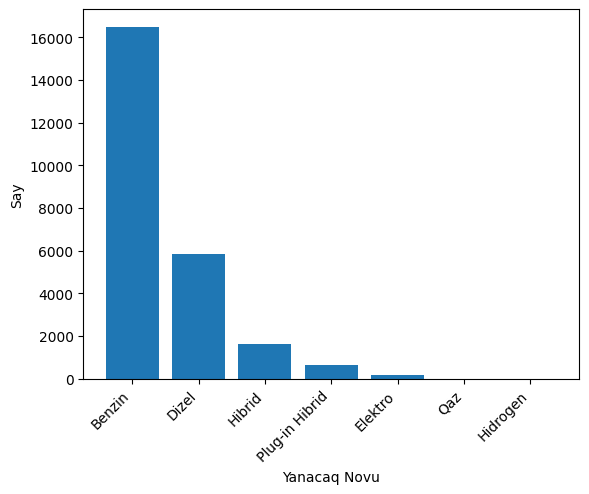

In [ ]:
plt.bar(X['yanacaq_novu'].value_counts().index, X['yanacaq_novu'].value_counts())
plt.xlabel('Yanacaq Novu')
plt.ylabel('Say')
plt.xticks(rotation=45, ha='right')
plt.show()

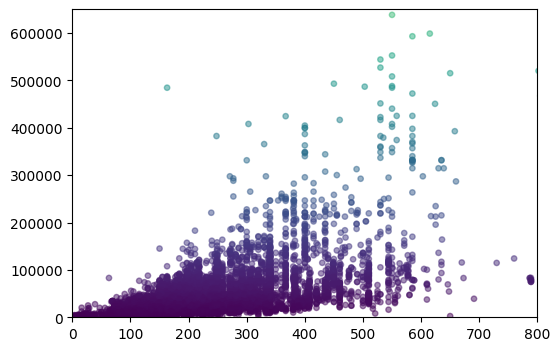

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
plt.scatter(X.at_gucu, df.price, c=df['price'], cmap='viridis', s=15, alpha=0.5);
min_value_x = 0
max_value_x = 800
min_value_y = 0
max_value_y = 650_000
ax.set_xlim([min_value_x, max_value_x])
ax.set_ylim([min_value_y, max_value_y])
plt.show();

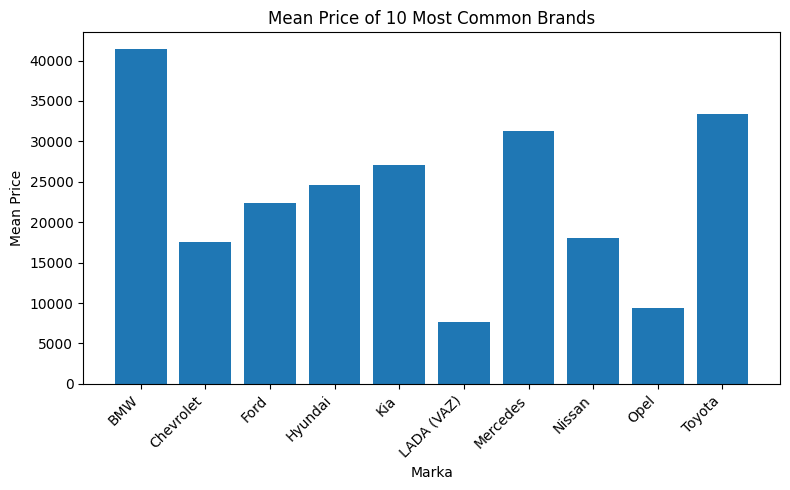

In [ ]:
# en cox elani olan 10 marka uzre orta qiymet
top_10_brands = df['Marka'].value_counts().head(10).index
mean_prices = df[df['Marka'].isin(top_10_brands)].groupby('Marka')['price'].mean()


plt.figure(figsize=(8, 5))
plt.bar(mean_prices.index, mean_prices.values)
plt.xlabel("Marka")
plt.ylabel("Mean Price")
plt.title("Mean Price of 10 Most Common Brands")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

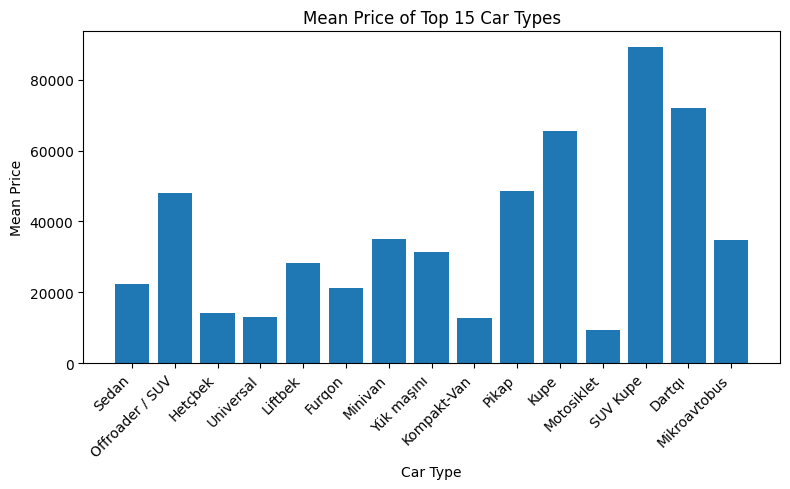

In [ ]:
# en cox elani olan 15 tip uzre orta qiymet
top_15_types = X['type'].value_counts().head(15).index
mean_prices = {}
for car_type in top_15_types:
    mean_prices[car_type] = y[X['type'] == car_type].mean()
mean_prices_series = pd.Series(mean_prices)

plt.figure(figsize=(8, 5))
plt.bar(mean_prices_series.index, mean_prices_series.values)
plt.xlabel("Car Type")
plt.ylabel("Mean Price")
plt.title("Mean Price of Top 15 Car Types")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();

# Model

In [ ]:
# Datani train ve test hisselerine boluruk
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
# numeric ve categoric sutunlarive sutun adlarini ayiririq
X_train_num = X_train.select_dtypes(include=[np.number])
X_train_cat = X_train.select_dtypes(exclude=[np.number])
num_features = X_train_num.columns
cat_features = X_train_cat.columns

In [ ]:
for col in X_train_cat.columns:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)
# categoric sutunlarin hamisinin deqiq string olmasi ucun

In [ ]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output = False))
])

transformer = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
], remainder='passthrough')

In [ ]:
# pipeline-dan sonra dataya ne qeder elave oldundugunu gormek ucun
transformed_data = transformer.fit_transform(X_train)
transformed_data.shape

(20000, 1534)

# Linear

In [ ]:
lin_reg = LinearRegression()
pipeline_lin = make_pipeline(transformer, lin_reg)
pipeline_lin.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['city', 'production_year', 'engine_displacement_num', 'kilometrage_num',
       'views', 'Arxa görüntü kamerası', 'Oturacaqların isidilməsi', 'ABS',
       'Kondisioner', 'Oturac...
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['barter', 'loan', 'salon', 'spare_parts', 'vip', 'featured',
       'Hansı bazar üçün yığılıb', 'Marka', 'Model', 'Rəng', 'Sahiblər',
       'Sürətlər qutusu', 'Vəziyyəti', 'Yeni', 'Yerlərin sayı', 'Ötürücü',
       'type', 'yanacaq_novu'],
      dtype='object'))])),
                ('linearregression', LinearRegression())])

In [ ]:
print(pipeline_lin.score(X_train, y_train), pipeline_lin.score(X_test, y_test))

0.7922627475034554 0.7104984363764841


In [ ]:
y_pred_lin = lin_reg.predict(transformer.transform(X_test))
mae = mean_absolute_error(y_test, y_pred_lin)
mae

7755.9432979716275

In [ ]:
mse = mean_squared_error(y_test, y_pred_lin)
rmse = np.sqrt(mse)   #kokalti aliriq
rmse

18817.297706712416

In [ ]:
lasso = Lasso(alpha=10, max_iter=10_000)
pipeline_lasso = make_pipeline(transformer, lasso)
pipeline_lasso.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.258e+09, tolerance: 2.612e+09
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['city', 'production_year', 'engine_displacement_num', 'kilometrage_num',
       'views', 'Arxa görüntü kamerası', 'Oturacaqların isidilməsi', 'ABS',
       'Kondisioner', 'Oturac...
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['barter', 'loan', 'salon', 'spare_parts', 'vip', 'featured',
       'Hansı bazar üçün yığılıb', 'Marka', 'Model', 'Rəng', 'Sahiblər',
       'Sürətlər qutusu', 'Vəziyyəti', 'Yeni', 'Yerlərin sayı', 'Ötürücü',
       'type', 'yanacaq_novu'],
      dtype='object'))])),
                ('lasso', Lasso(alpha=10, max_iter=10000))])

In [ ]:
print(pipeline_lasso.score(X_train, y_train), pipeline_lasso.score(X_test, y_test))

0.7008811959191124 0.6649358118355697


In [ ]:
y_pred_lasso = lasso.predict(transformer.transform(X_test))
mae = mean_absolute_error(y_test, y_pred_lasso)
mae

9170.582445774597

In [ ]:
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)
rmse

20243.975609042267

In [ ]:
ridge = Ridge(solver='saga')      #saga boyuk data setlerle islemek ucun daha suretlidir
pipeline_ridge = make_pipeline(transformer, ridge)
pipeline_ridge.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['city', 'production_year', 'engine_displacement_num', 'kilometrage_num',
       'views', 'Arxa görüntü kamerası', 'Oturacaqların isidilməsi', 'ABS',
       'Kondisioner', 'Oturac...
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['barter', 'loan', 'salon', 'spare_parts', 'vip', 'featured',
       'Hansı bazar üçün yığılıb', 'Marka', 'Model', 'Rəng', 'Sahiblər',
       'Sürətlər qutusu', 'Vəziyyəti', 'Yeni', 'Yerlərin sayı', 'Ötürücü',
       'type', 'yanacaq_novu'],
      dtype='object'))])),
                ('ridge', Ridge(solver='saga'))])

In [ ]:
print(pipeline_ridge.score(X_train, y_train), pipeline_ridge.score(X_test, y_test))

0.7063039974133081 0.6738075416670095


In [ ]:
y_pred_ridge = ridge.predict(transformer.transform(X_test))
mae = mean_absolute_error(y_test, y_pred_ridge)
mae

9080.329735765055

In [ ]:
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
rmse

19974.170694405253

# Tree

In [ ]:
tree_reg = DecisionTreeRegressor()
pipeline_tree = make_pipeline(transformer, tree_reg)
pipeline_tree.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['city', 'production_year', 'engine_displacement_num', 'kilometrage_num',
       'views', 'Arxa görüntü kamerası', 'Oturacaqların isidilməsi', 'ABS',
       'Kondisioner', 'Oturac...
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['barter', 'loan', 'salon', 'spare_parts', 'vip', 'featured',
       'Hansı bazar üçün yığılıb', 'Marka', 'Model', 'Rəng', 'Sahiblər',
       'Sürətlər qutusu', 'Vəziyyəti', 'Yeni', 'Yerlərin sayı', 'Ötürücü',
       'type', 'yanacaq_novu'],
      dtype='object'))])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [ ]:
print(pipeline_tree.score(X_train, y_train), pipeline_tree.score(X_test, y_test))
# Overfitting var

1.0 0.5861354209670462


In [ ]:
tree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
tree_params = {
    'decisiontreeregressor__max_depth': [5, 10, 15, 25]}

grid_tree = GridSearchCV(pipeline_tree, tree_params, cv=5, return_train_score=True)
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['city', 'production_year', 'engine_displacement_num', 'kilometrage_num',
       'views', 'Arxa görüntü kamerası', 'Oturacaqların isidilməsi'...
                                                                         Index(['barter', 'loan', 'salon', 'spare_parts', 'vip', 'featured',
       'Hansı bazar üçün yığılıb', 'Marka', 'Model', 'Rəng', 'Sahiblər',
       'Sürətlər qutusu', 'Vəziyyəti', 'Yeni', 'Yerlərin sayı', 'Ötürücü',
       'type', 'yanacaq_novu'],
      dtype='object'))])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': [5, 10, 15, 25]},
             return_train_score=True)

In [ ]:
results = grid_tree.cv_results_

print("GridSearchCV Results (Train and Test Scores):")
for mean_train_score, mean_test_score, params in zip(results['mean_train_score'], results['mean_test_score'], results['params']):
    print(f"Prarmeters: {params}, Train score: {mean_train_score:.4f}, Test Score: {mean_test_score:.4f}")


GridSearchCV Results (Train and Test Scores):
Prarmeters: {'decisiontreeregressor__max_depth': 5}, Train score: 0.8007, Test Score: 0.6765
Prarmeters: {'decisiontreeregressor__max_depth': 10}, Train score: 0.9506, Test Score: 0.7971
Prarmeters: {'decisiontreeregressor__max_depth': 15}, Train score: 0.9873, Test Score: 0.7855
Prarmeters: {'decisiontreeregressor__max_depth': 25}, Train score: 0.9996, Test Score: 0.7679


In [ ]:
pipeline_tree1 = make_pipeline(transformer, DecisionTreeRegressor(max_depth=5,random_state=8))
pipeline_tree1.fit(X_train, y_train)
print(pipeline_tree1.score(X_train, y_train), pipeline_tree1.score(X_test, y_test))

0.8060634949451433 0.7565241391611057


In [ ]:
forest_reg = RandomForestRegressor(n_estimators=70, random_state=7)
pipeline_forest = make_pipeline(transformer, forest_reg)
pipeline_forest.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['city', 'production_year', 'engine_displacement_num', 'kilometrage_num',
       'views', 'Arxa görüntü kamerası', 'Oturacaqların isidilməsi', 'ABS',
       'Kondisioner', 'Oturac...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['barter', 'loan', 'salon', 'spare_parts', 'vip', 'featured',
       'Hansı bazar üçün yığılıb', 'Marka', 'Model', 'Rəng', 'Sahiblər',
       'Sürətlər qutusu', 'Vəziyyəti', 'Yeni', 'Yerlərin sayı', 'Ötürücü',
       'type', 'yanacaq_novu'],
      dtype='object'))])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=70, random_state=7))])

In [ ]:
print(pipeline_forest.score(X_train, y_train), pipeline_forest.score(X_test, y_test))

0.9808376359855345 0.9116032375388812


In [ ]:
forest_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 70,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 7,
 'verbose': 0,
 'warm_start': False}

In [ ]:
pipeline_forest1 = make_pipeline(transformer, RandomForestRegressor(n_estimators=50, random_state=7))
pipeline_forest1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['city', 'production_year', 'engine_displacement_num', 'kilometrage_num',
       'views', 'Arxa görüntü kamerası', 'Oturacaqların isidilməsi', 'ABS',
       'Kondisioner', 'Oturac...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['barter', 'loan', 'salon', 'spare_parts', 'vip', 'featured',
       'Hansı bazar üçün yığılıb', 'Marka', 'Model', 'Rəng', 'Sahiblər',
       'Sürətlər qutusu', 'Vəziyyəti', 'Yeni', 'Yerlərin sayı', 'Ötürücü',
       'type', 'yanacaq_novu'],
      dtype='object'))])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=50, random_state=7))])

In [ ]:
print(pipeline_forest1.score(X_train, y_train), pipeline_forest1.score(X_test, y_test))

0.9795696295679316 0.9093845797413039


# PCA

In [ ]:
pipeline_pca = Pipeline([
    ('transformer', ColumnTransformer([
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ], remainder='passthrough')),
    ('pca', PCA(n_components=0.9999))
])


In [ ]:
trans_pca = pipeline_pca.fit_transform(X_train, y_train)

In [ ]:
trans_pca.shape

(20000, 1313)

In [ ]:
tree_reg_pca = DecisionTreeRegressor(random_state=7)
pipeline_tree_pca = make_pipeline(pipeline_pca, tree_reg_pca)
pipeline_tree_pca.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('transformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   Index(['city', 'production_year', 'engine_displacement_num', 'kilometrage_num',
       'views', 'Arxa görüntü kamerası', 'Oturacaqların isidilməsi', 'ABS'...
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   Index(['barter', 'loan', 'salon', 'spare_parts', 'vip', 'featured',
       'Hansı bazar üçün yığılıb', 'Marka', 'Model', 'Rəng', 'Sahiblər',
       'Sürətlər qutusu', 'Vəziyyəti', 'Yeni', 'Yerlərin sayı', 'Ötürücü',
       'type', 'yanacaq_novu'],
      dtype='object'))])),
                                 ('pca', PCA(n_components=0.9999))])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=7))])

In [ ]:
print(pipeline_tree_pca.score(X_train, y_train), pipeline_tree_pca.score(X_test, y_test))

0.9782062314054883 0.5368994920203474


In [ ]:
lin_reg_pca = LinearRegression()
pipeline_lin_pca = make_pipeline(pipeline_pca, lin_reg_pca)
pipeline_lin_pca.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('transformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   Index(['city', 'production_year', 'engine_displacement_num', 'kilometrage_num',
       'views', 'Arxa görüntü kamerası', 'Oturacaqların isidilməsi', 'ABS'...
                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                  sparse_output=False))]),
                                                                   Index(['barter', 'loan', 'salon', 'spare_parts', 'vip', 'featured',
       'Hansı bazar üçün yığılıb', 'Marka', 'Model', 'Rəng', 'Sahiblər',
       'Sürətlər qutusu', 'Vəziyyəti', 'Yeni', 'Yerlərin sayı', 'Ötürücü',
       'type', 'yanacaq_novu'],
      dtype='object'))])),
                                 ('pca', PCA(n_components=0.9999))])),
                ('linearregression', LinearRegression())])

In [ ]:
print(pipeline_lin_pca.score(X_train, y_train), pipeline_lin_pca.score(X_test, y_test))

0.7532855497005126 0.690417065531925


# Plot

In [ ]:
pipelines = ['pipeline_lin','pipeline_lasso', 'pipeline_ridge', 'pipeline_tree', 'pipeline_tree1', 'pipeline_forest',
             'pipeline_forest1', 'pipeline_tree_pca', 'pipeline_lin_pca']

train_scores = [pipeline_lin.score(X_train, y_train),
                pipeline_lasso.score(X_train, y_train),
                pipeline_ridge.score(X_train, y_train),
                pipeline_tree.score(X_train, y_train),
                pipeline_tree1.score(X_train, y_train),
                pipeline_forest.score(X_train, y_train),
                pipeline_forest1.score(X_train, y_train),
                pipeline_tree_pca.score(X_train, y_train),
                pipeline_lin_pca.score(X_train, y_train)]


test_scores = [pipeline_lin.score(X_test, y_test),
                pipeline_lasso.score(X_test, y_test),
                pipeline_ridge.score(X_test, y_test),
                pipeline_tree.score(X_test, y_test),
                pipeline_tree1.score(X_test, y_test),
                pipeline_forest.score(X_test, y_test),
                pipeline_forest1.score(X_test, y_test),
                pipeline_tree_pca.score(X_test, y_test),
                pipeline_lin_pca.score(X_test, y_test)]

score_df = pd.DataFrame({'Pipeline': pipelines*2,
                     'Score': train_scores + test_scores,
                     'Type': ['Train']*len(pipelines) + ['Test']*len(pipelines)})

In [ ]:
score_df

,Pipeline,Score,Type
0,pipeline_lin,0.792263,Train
1,pipeline_lasso,0.700881,Train
2,pipeline_ridge,0.706304,Train
3,pipeline_tree,1.000000,Train
4,pipeline_tree1,0.806063,Train
5,pipeline_forest,0.980838,Train
6,pipeline_forest1,0.979570,Train
7,pipeline_tree_pca,0.978206,Train
8,pipeline_lin_pca,0.753286,Train
9,pipeline_lin,0.710498,Test


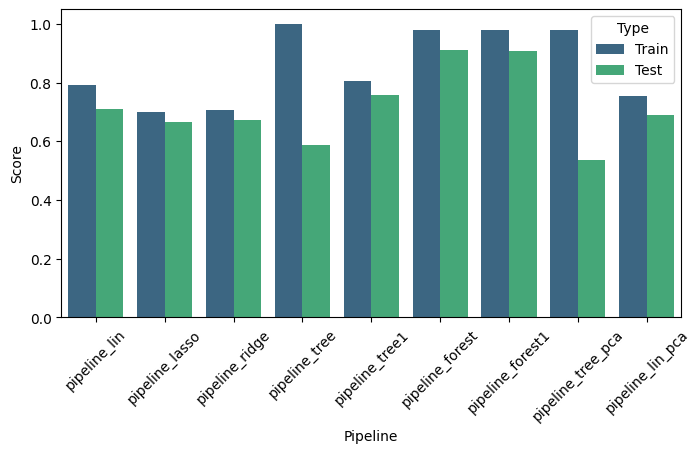

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Pipeline', y='Score', hue='Type', data=score_df, palette="viridis")
plt.xticks(rotation=45)
plt.show();